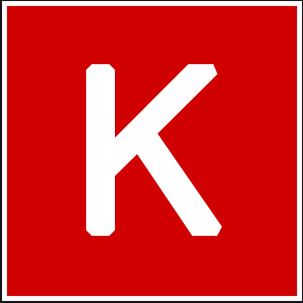

# <center>MNIST Classification Using Plain Neural Network with Keras</center>

# 1. Introduction

In this excercise/mini project I am trying to classify the famous MNIST dataset.

<b>Goal</b>: Primary goal of this excercise is to equip myself with Keras set up with regards to the Plain Neural Network. Secondary goal is to achieve atleast 98% success in predicting the right labels for the MNIST Images.

<b>Dataset</b>: The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. You can read more about the dataset <a href='https://en.wikipedia.org/wiki/MNIST_database'>here</a>. The data is downloaded(called) from the Keras' dataset library.

<b>Approach</b>: First the dataset is downloaded & I set up a model based on intuition. I then iterartively change the hyperparameters (such as the number of layers, number of units, whether or not to regaularize, what optimizer to use, how long to train etc.) as I try to improve the performance of the model.

<b>Results</b>: After going through several iterative process, the final model with 4 hidden layers and a total of 111146 of trainable parameters after 20 epochs of training using the adam optimizer has 99.63% training set accuracy and 98.15% test set accuracy.

<b>Future Works</b>: As there's still a gap of almost 1.5% between the train & test set accuracy, one can try follow the same iterartive process to reduce the variance or use Convolutional Neural Network.

<b>Dates</b>: Feb 15th 2020

# 2. Libraries

In [75]:
import keras as K
import numpy as np
import matplotlib.pyplot as plt

# 3. Dataset

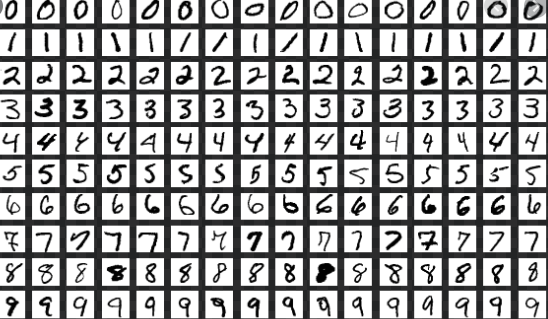

In [76]:
(x_train, y_train), (x_test, y_test) = K.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3.1 Shape

The Shape of the dataset tells us there're 60000 training samples & each training sample is a image represented in the form of 28x28 (784) pixel values.

In [77]:
print('Shapes of Train & Test Sets')
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test: ' + str(x_test.shape))
print('y_test: ' + str(y_test.shape))

Shapes of Train & Test Sets
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


# 3.2 Bayes Optimal Error

I try to look at the image to get a sense of Bayes optimal error and in this case <b>Human Error</b> should be a near approximate measure for the Bayes optimal error. And Bayes optimal error is deduced to be very very miniscule (i.e it should be more closer to 0.001 than to 0.01) 

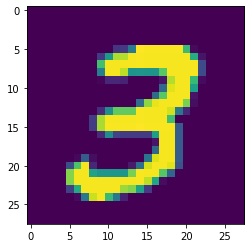

In [78]:
index = 7
plt.imshow(x_train[index])

# 4. Model Preparation

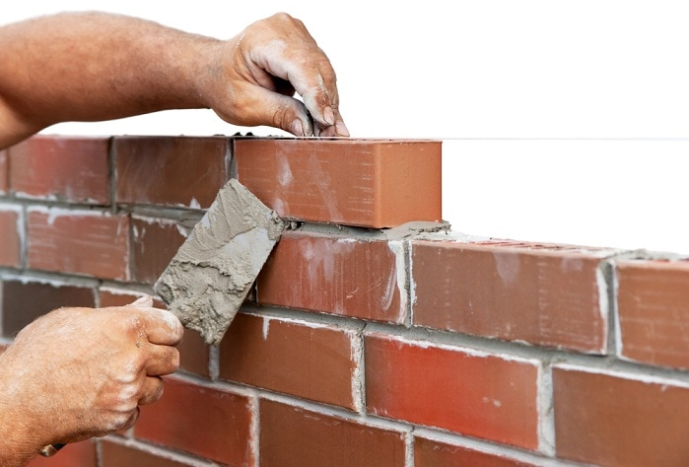

<i><a href='http://www.understandconstruction.com/walls.html'>Image Source</a></i>

After several rounds of careful iteration below model with 4 hidden layers and 111146 trainable parameters as the final model. The initial flatten layers is used to just unroll 28x28 pixel values in to 784 rows of 1 column vector for a single datapoint such that new array is of shape 784x60000 where each column is a datapoint and each of the 784 rows are features or dimensions. Note that I've not applied any regularization technique.

In [79]:
model = K.models.Sequential([
    K.layers.Flatten(input_shape=(28, 28)),
    K.layers.Dense(128, activation='relu'),
    K.layers.Dense(64, activation='relu'),
    K.layers.Dense(32, activation='relu'),
    K.layers.Dense(10),
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


I chose the <b>Adam Optimizer</b> for the gradient optimation as it provides the best of both Momentum & the RMS Prop (Root Mean Square) approach for optimization. <b> SparseCategoricalCrossentropy </b> is used for the multinomial classification using softmax regression function to calculate loss. Finally we've selected <b>accuracy</b> as one number measure for the model.

In [80]:
model.compile(optimizer='adam',
              loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

After several rounds iteration <b>20 epochs</b> is chosen as the optimum time till which the gradient descent optimatizion is continued when training the data. Training set accuracy is realized at 99.58% after 20 epochs worth of training. The total time taken to train was approximately 100 seconds

In [81]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2526 - accuracy: 0.9235
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1051 - accuracy: 0.9681
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0760 - accuracy: 0.9760
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0594 - accuracy: 0.9813
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0480 - accuracy: 0.9844
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0390 - accuracy: 0.9876
Epoch 7/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0343 - accuracy: 0.9889
Epoch 8/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0306 - accuracy: 0.9902
Epoch 9/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0258 - accuracy: 0.9914
Epoch 10/20
60000/60000 [==============================

# 5. Model Evaluation
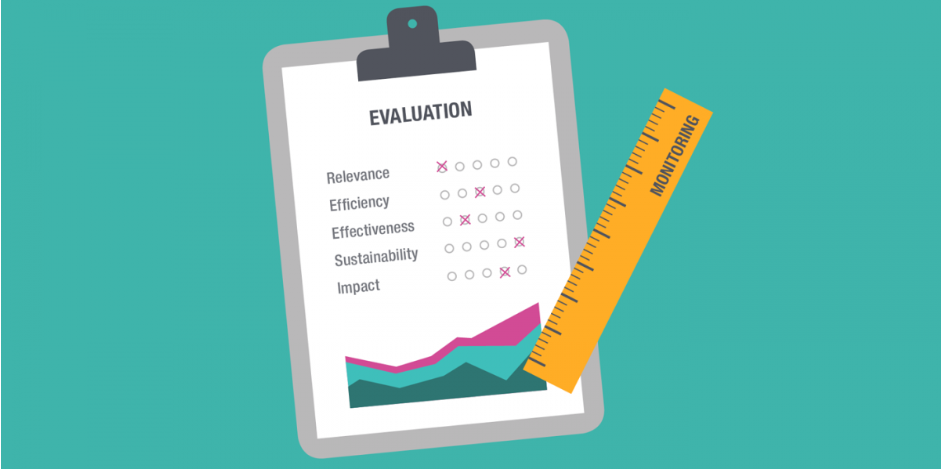

<i><a href='https://www.odi.org/blogs/10594-2018-time-update-dac-evaluation-criteria'>Image Source</a></i>

An Overall accuracy of <b>98.15%</b> is quite close to the training accuracy of 99.63% interms of traditional classifier performance.

In [82]:
model.evaluate(x_test,  y_test, verbose=2)

[0.13566205413069932, 0.9749000072479248]

# 6. Conclusion 
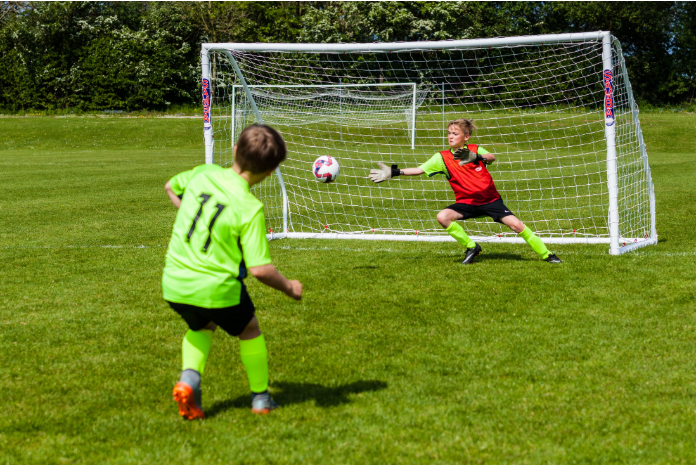

<i><a href='https://www.thesoccerstore.co.uk/blog/latest-news/how-to-score-more-goals-in-football/'>Image Source</a></i>

Based on the above excersice I can safely say I was able to achieve both of my objectives (that ball is definitely going in ;))

1. Successfully understood and applied keras sequential model works for plain multilayered neural networks
2. Built a model with 98% accuracy on the test set. 